# Problem Set 3

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Part 1 will be relatively easy; Part 2 will take more time.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

In [2]:
%matplotlib inline  
import matplotlib.pyplot as plt  

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://www.kellogg.northwestern.edu/faculty/weber/emp/_session_3/boston.htm).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:

*NOTE - This dataset is similar to the one you used in PS1; we are just using a different method to load it this time. The column names and their order will remain the same for this dataset as was in PS1.*

In [3]:
# load Boston housing data set
data = np.loadtxt('data.txt')
target = np.loadtxt('target.txt')

---

## Part 1: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.
Before beginning the "real" work, refamiliarize yourself with the dataset.

### 1.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation). Do not use a built-in function  to compute RMSE, other than numpy functions like `sqrt` and if needed, `sum` or other relevant ones.

In [4]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print(compute_rmse((2,2,3),(0,2,6)))
2.08
"""
def compute_rmse(predictions, yvalues):
    # your code here
    n = len(yvalues)
    np_p = np.array(predictions)
    np_y = np.array(yvalues)
    mse = (np.sum((np_y - np_p)**2))/n
    rmse = np.sqrt(mse)
    
    return rmse

In [5]:
compute_rmse((2,2,3),(0,2,6))

2.0816659994661326

In [6]:
#sanity check
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error((0,2,6),(2,2,3))))

2.0816659994661326


### 1.2 Divide your data into training and testing datasets

Randomly select 75% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 25% in a testing dataset (call this "bdata_test"). Do not use built-in functions.

To perform any randomized operation, only use functions in the *numpy library (np.random)*. Do not use other packages for random functions.

In [5]:
df = pd.DataFrame(data, columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'
 ,'B', 'LSTAT'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.218960,18.0,2.629288,0.0,0.869420,6.875396,65.2,4.347275,1.0,307.0,15.534711,397.462329,5.715647
1,0.141576,0.0,7.315612,0.0,0.549711,6.499894,78.9,5.315684,2.0,255.0,17.914131,397.012611,9.338417
2,0.380457,0.0,7.340354,0.0,0.697928,7.263489,61.1,5.356935,2.0,243.0,17.919989,396.628236,4.142473
3,0.313563,0.0,2.562407,0.0,0.599629,7.209732,45.8,6.103983,3.0,226.0,18.979527,398.564784,3.239272
4,0.330105,0.0,2.497337,0.0,0.476077,7.184111,54.2,6.264372,3.0,234.0,18.708888,399.487766,6.115159
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.205345,0.0,11.992590,0.0,0.686750,6.895386,69.1,2.805111,1.0,282.0,21.325449,395.822256,9.795056
502,0.120722,0.0,11.994115,0.0,0.583991,6.313574,76.7,2.652694,1.0,282.0,21.032632,398.559567,9.785685
503,0.226099,0.0,12.254201,0.0,0.689092,7.199346,91.0,2.348891,1.0,284.0,21.042043,398.026747,5.831161
504,0.139833,0.0,12.054379,0.0,0.650875,7.065029,89.3,2.783274,1.0,275.0,21.105130,395.290366,6.890841


In [12]:
df['CRIM'] > 0.2

0       True
1      False
2       True
3       True
4       True
       ...  
501     True
502    False
503     True
504    False
505    False
Name: CRIM, Length: 506, dtype: bool

In [8]:
df.index

RangeIndex(start=0, stop=506, step=1)

In [9]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

# enter your code here
a = np.array(df.index)
bdata_train_idx =  np.random.choice(a, int(len(data) * .75), replace=False)
bdata_test_idx = np.array(list(set(a) - set(list(bdata_train_idx))))

In [10]:
bdata_train_idx
bdata_train = df.loc[bdata_train_idx]
bdata_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
440,22.406867,0.0,18.247928,0.0,1.099452,6.199415,92.4,2.224853,24.0,679.0,20.568926,391.952694,22.798646
215,0.476132,0.0,10.794566,0.0,0.766851,6.208124,42.4,4.032132,4.0,280.0,18.819660,397.172838,9.537777
212,0.532648,0.0,10.799418,1.0,0.802291,6.063011,53.8,4.043867,4.0,289.0,18.982791,394.249614,16.440364
197,0.187889,80.0,1.526865,0.0,0.708481,7.499923,36.6,7.572798,2.0,334.0,12.865843,355.462216,9.173969
161,1.741062,0.0,19.780861,0.0,0.664006,7.614751,90.8,2.115829,5.0,416.0,14.859422,376.320064,2.378481
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.337218,22.0,6.084512,0.0,0.581662,6.801661,13.0,7.403274,7.0,335.0,19.107446,397.859455,5.998552
234,0.512504,0.0,6.580187,1.0,0.712120,6.968519,66.5,3.881264,8.0,320.0,17.698826,361.003848,8.304312
321,0.579820,0.0,7.728320,0.0,0.583601,6.519646,54.3,4.567283,5.0,298.0,19.742408,398.513612,7.516190
425,16.036995,0.0,18.158980,0.0,0.959856,6.155798,95.4,2.000084,24.0,680.0,20.584821,7.738484,24.984607


In [11]:
bdata_test = df.loc[bdata_test_idx]
bdata_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
9,0.512354,12.5,7.904262,0.0,0.743540,6.135438,85.9,6.631109,5.0,319.0,15.526087,389.794672,17.734252
10,0.471014,12.5,8.105223,0.0,0.696355,6.630284,94.3,6.559948,5.0,318.0,15.329414,394.426261,20.722270
11,0.378099,12.5,8.037368,0.0,0.733438,6.037591,82.9,6.255507,5.0,320.0,15.208535,398.942967,13.471264
18,0.912070,0.0,8.166062,0.0,0.546885,5.597011,36.6,4.055867,4.0,315.0,21.232716,290.847821,12.050425
20,1.540105,0.0,8.476673,0.0,0.778953,5.905249,98.1,3.946739,4.0,311.0,21.224087,380.568759,21.639829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0.368150,0.0,10.012763,0.0,0.676803,6.060125,54.0,2.750478,6.0,401.0,19.539634,396.940713,12.058560
494,0.636953,0.0,9.906713,0.0,0.602914,6.045584,42.6,2.630936,6.0,403.0,19.459740,396.919728,13.637231
501,0.205345,0.0,11.992590,0.0,0.686750,6.895386,69.1,2.805111,1.0,282.0,21.325449,395.822256,9.795056
502,0.120722,0.0,11.994115,0.0,0.583991,6.313574,76.7,2.652694,1.0,282.0,21.032632,398.559567,9.785685


### 1.3 Use a very bad baseline for prediction, and compute RMSE

Let's start by creating a very bad baseline model that predicts median home values as the averages of `MEDV` based on adjacency to Charles River. 

Specifically, create a model that predicts, for every observation X_i, the median home value as the average of the median home values of all houses in the **training set** that have the same adjacency value as the observation.

For example - For an input observation where `CHAS==1`, the model should predict the `MEDV` as the mean of all `MEDV` values in the training set that also have `CHAS==1`.



Once the model is built, do the following:

1. Compute the RMSE of the training set.
2. Now compute the RMSE of the test data set (but use the model you trained on the training set!).
3. How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?
4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in red. Make sure to label your axes appropriately, and add a legend to your figure to make clear which dots are which.
5. Add code to your function to measure the running time of your algorithm. How long does it take to compute the predicted values for the test data?


*NOTE - Be careful while dealing with floats and integers. Additionally, the `groupby` operation might come handy here.*

In [12]:
target_df = pd.DataFrame(target, columns = ['MEDV'])

In [13]:
#merge target data with training data set based on index
bdata_train_base_CR = bdata_train.merge(target_df, left_index=True, right_index=True)[['CHAS','MEDV']]
# Baseline model with group mean as prediction
base_model_train = bdata_train_base_CR.groupby('CHAS').agg({'MEDV': ['mean']})

cas1_train = float(base_model_train.iloc[0].values)
cas0_train = float(base_model_train.iloc[1].values)

#adding a column as the y_prediction value for the test set
bdata_train_base_CR['y_predict'] = base_model_train
bdata_train_base_CR.loc[bdata_train_base_CR['CHAS'] == 1.0, 'y_predict'] = cas1_train
bdata_train_base_CR.loc[bdata_train_base_CR['CHAS'] == 0.0, 'y_predict'] = cas0_train

bdata_train_base_CR

,CHAS,MEDV,y_predict
440,0.0,10.5,28.134783
215,0.0,25.0,28.134783
212,1.0,22.4,22.236236
197,0.0,30.3,28.134783
161,0.0,50.0,28.134783
...,...,...,...
250,0.0,24.4,28.134783
234,1.0,29.0,22.236236
321,0.0,23.1,28.134783
425,0.0,8.3,28.134783


In [14]:
from time import time


#merge target data with test data set based on index
bdata_test_base_CR = bdata_test.merge(target_df, left_index= True, right_index= True)[['CHAS','MEDV']]

t0 = time()

#model on test dataset
base_model_test = bdata_test_base_CR.groupby('CHAS').agg({'MEDV': ['mean']})

t1 = time()
print('compute the predicted values for the test data function takes %f' %(t1-t0))

compute the predicted values for the test data function takes 0.002989


In [15]:
#getting the y_predict value for each CHAS value
cas1_test = float(base_model_test.iloc[0].values)
cas0_test = float(base_model_test.iloc[1].values)

#adding a column as the y_prediction value for the test set
bdata_test_base_CR['y_predict'] = base_model_test
bdata_test_base_CR.loc[bdata_test_base_CR['CHAS'] == 1.0, 'y_predict'] = cas1_test
bdata_test_base_CR.loc[bdata_test_base_CR['CHAS'] == 0.0, 'y_predict'] = cas0_test

bdata_test_base_CR

,CHAS,MEDV,y_predict
9,0.0,18.9,29.025
10,0.0,15.0,29.025
11,0.0,18.9,29.025
18,0.0,20.2,29.025
20,0.0,13.6,29.025
...,...,...,...
493,0.0,21.8,29.025
494,0.0,24.5,29.025
501,0.0,22.4,29.025
502,0.0,20.6,29.025


In [16]:
#calculate the RMSE for the training data based on y_training and y_prediction(mean)
train_predictions = bdata_train_base_CR['y_predict']
train_yvalues = bdata_train_base_CR['MEDV']
compute_rmse(train_predictions, train_yvalues)

10.73014468436032

In [17]:
#calulate the RMSE for the test data based on y_prediction(mean) and y_test
test_predictions = bdata_test_base_CR['y_predict']
test_yvalues = bdata_test_base_CR['MEDV']
compute_rmse(test_predictions, test_yvalues)

11.845547450978923

How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?
- The test RMSE is lower than the train dataset RMSE. It is what I expected because the data entries for the test dataset is less than the traning set; therefore the variance for the test dataset is lower, which can be the effect of a lower RMSE.


Text(0, 0.5, 'Predict Value')

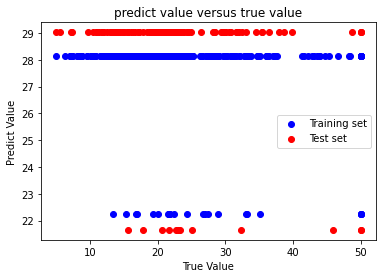

In [18]:
#Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in red. Make sure to label your axes appropriately, and add a legend to your figure to make clear which dots are which.
plt.scatter(bdata_train_base_CR.MEDV, bdata_train_base_CR.y_predict,  c='b', label='Training set')
plt.scatter(bdata_test_base_CR.MEDV, bdata_test_base_CR.y_predict, c='r', label='Test set')
plt.legend()
plt.title('predict value versus true value')
plt.xlabel('True Value')
plt.ylabel('Predict Value')

In [267]:
print('compute the predicted values for the test data function takes %f' %(t1-t0))

compute the predicted values for the test data function takes 0.002989


How long does it take to compute the predicted values for the test data?
- compute the predicted values for the test data function takes around 0.0029

---

## Part 2: Nearest Neighbors


### 2.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm][1] distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (1,2) and (1,8), and then compute the Manhattan distance between (4,4) and (12,10).

[1]: https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm

In [19]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print(distance((1,2),(1,8),2))
6


def distance(x1, x2, L):
    #array of y
    p = np.array([x1[1], x2[1]])
    #array of x
    q = np.array([x1[0], x2[0]])
    
    if L == 1:

        return np.sum(np.absolute(p -q))
    if L == 2:
        print(p,q)
        return np.sqrt(np.sum(p - q)**2)
"""

    
def distance(x1, x2, L):
    p1 = np.array(x1)
    q1 = np.array(x2)
    diff = q1 - p1
    
    if L == 1:
        return np.sum(np.absolute(diff))
    if L == 2:
        return np.sqrt(np.sum(diff)**2)

In [268]:
#test run
print(distance(([1,0,0],[2,0,7]),([1,0,9],[8,0,0]),2))

8.0


### 2.2 Basic Nearest Neighbor algorithm

Your next task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use three input features (`CRIM, RM and ZN`) and a single output (`MEDV`).  In other words, you are modelling the relationship between median home value and crime rates, house size and the proportion of residential land zoned for lots.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the `MEDV` value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function. Use L=2 for all questions henceforth unless explicitly stated otherwise.

Make sure to do the following - 
1. Fill in the function specification below
2. Use your algorithm to predict the median home value of every instance in the test set. Report the RMSE ("test RMSE")
3. Use your algorithm to predict the median home value of every instance in the training set and report the training RMSE.
4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in red. 
5. Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.
6. How does the performance (test RMSE and total runtime) of your nearest neighbors algorithm compare to the baseline in part 1.3?

In [21]:
basicNN_train_df = bdata_train[['CRIM','RM','ZN']].merge(target_df, left_index= True, right_index= True)
basicNN_train_df

,CRIM,RM,ZN,MEDV
440,22.406867,6.199415,0.0,10.5
215,0.476132,6.208124,0.0,25.0
212,0.532648,6.063011,0.0,22.4
197,0.187889,7.499923,80.0,30.3
161,1.741062,7.614751,0.0,50.0
...,...,...,...,...
250,0.337218,6.801661,22.0,24.4
234,0.512504,6.968519,0.0,29.0
321,0.579820,6.519646,0.0,23.1
425,16.036995,6.155798,0.0,8.3


In [22]:
basicNN_test_df = bdata_test[['CRIM','RM','ZN']].merge(target_df, left_index= True, right_index= True)
basicNN_test_df

,CRIM,RM,ZN,MEDV
9,0.512354,6.135438,12.5,18.9
10,0.471014,6.630284,12.5,15.0
11,0.378099,6.037591,12.5,18.9
18,0.912070,5.597011,0.0,20.2
20,1.540105,5.905249,0.0,13.6
...,...,...,...,...
493,0.368150,6.060125,0.0,21.8
494,0.636953,6.045584,0.0,24.5
501,0.205345,6.895386,0.0,22.4
502,0.120722,6.313574,0.0,20.6


In [23]:
basicNN_df = pd.concat([basicNN_train_df, basicNN_test_df])

test RMSE | train RMSW
Time taken: 5.52 seconds
(11.4933428180777, 11.501627738422306)


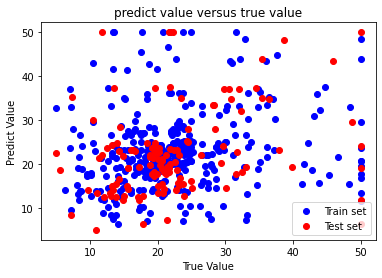

In [269]:
"""
Function
--------
Nearest Neighbors

Implementation of nearest neighbors algorithm.

Parameters
----------
x_train: array
    Array of numerical feature values for training the model.
y_train: array
    Array of numerical output values for training the model.
x_test: array
    Array of numerical feature values for testing the model.
y_test: array
    Array of numerical output values for testing the model.
L: int
    Order of L-norm function used for calculating distance.

Returns
-------
rmse : int
    Value of the RMSE from data.
"""

import time 
    
    
#nneighbor for the trainning set
def nneighbortrain(x_train,y_train, x_test,y_test, L):
    #create a list for predict value
    predict_test = []

    for i in range (len(x_train)):

        #create new train set for compare
        curr_x_train = x_train.drop(x_train.copy().index[i])

        #get the test set value
        test_row_train = x_train.iloc[i].values

        #compare test set value with whole training set
        diff_fun_train = curr_x_train.apply(lambda row: distance(row, test_row_train, L), axis = 1)

        #get the index of the value
        idx = diff_fun_train[diff_fun_train == min(diff_fun_train)].index[0]

        #create a new predict value and append it to the list
        y_predict_train = y_train.loc[idx]
        predict_test.append(y_predict_train)


    rmse = compute_rmse(predict_test, y_train)

    return rmse, predict_test
    
#nneighbor for the test set     
def nneighbortest(x_train,y_train, x_test, y_test, L):
    #create a list for predict value
    predict_test = []

    for i in range (len(x_test)):

        #get the test set value
        test_row = x_test.iloc[i].values

        #compare test set value with whole training set
        diff_fun = x_train.apply(lambda row: distance(row, test_row, L), axis = 1)

        #get the index of the value
        idx = diff_fun[diff_fun == min(diff_fun)].index[0]

        #create a new predict value and append to the list
        y_predict_test = y_train.loc[idx]
        predict_test.append(y_predict_test)
        
    rmse = compute_rmse(predict_test, y_test)

    return rmse, predict_test
    
##plot graph function   
def plotgraph(x_train,y_train, x_test,y_test,L):
    y_predict_train = nneighbortrain(x_train,y_train, x_test,y_test, L)[1]
    y_predict_test = nneighbortest(x_train,y_train, x_test,y_test, L)[1]
    
    #Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in red. Make sure to label your axes appropriately, and add a legend to your figure to make clear which dots are which.
    plt.scatter(y_train, y_predict_train, c='b', label='Train set')
    plt.scatter(y_test, y_predict_test,  c='r', label='Test set')
    plt.legend()
    plt.title('predict value versus true value')
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    

#The nneighbor function    
def nneighbor(x_train,y_train, x_test,y_test, L):
    start_time = time.time()
    #your code here
    
    r_train = nneighbortrain(x_train,y_train, x_test,y_test, L)[0]
    r_test = nneighbortest(x_train,y_train, x_test,y_test, L)[0]
    
    
    rmse = (r_test,r_train)
    
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return rmse
    
#drive code
x_train = basicNN_train_df[['CRIM', 'RM', 'ZN']]
y_train = basicNN_train_df['MEDV']
x_test = basicNN_test_df[['CRIM', 'RM', 'ZN']]
y_test = basicNN_test_df['MEDV']


print(nneighbor(x_train,y_train, x_test,y_test, 2))
plotgraph(x_train,y_train, x_test,y_test,2)

Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.
- Total time is around 5.5 seconds. 
- Test set RMSE is 11.49; Train set RMSE is 11.50.

How does the performance (test RMSE and total runtime) of your nearest neighbors algorithm compare to the baseline in part 1.3?
- Much longer run time compairing to the base line is 0.0029; the RMSE for train set is not as accurate as the baseline model, the test set model improved slightly compare to the baseline model.  

### 2.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the standardized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using `CRIM, RM and ZN` as input), and compare the RMSE from this method with your previous RMSE evaluations. What do you observe?

*NOTE*: To normalize properly, you should compute the mean and standard deviation on the training set, and use the same values to normalize both the training and the testing dataset.

*NOTE 2*: In this case, the normalization may or may not reduce the RMSE; don't get confused if you find that to be the case.

In [72]:
"""
Function
--------
Normalize data

Normalize all of the features in a data frame.

Parameters
----------
raw_data: array
    Array of numerical values to normalize.

Returns
-------
normalized_data : array
    The array with normalized values for all features
"""
def normalize(raw_data):

    np_data = np.array(raw_data)
    mean = np.sum(np_data)/len(np_data)
    D = np.sum((np_data - mean)**2)/len(np_data)
    SD = np.sqrt(D)

    normalized_data = (np_data - mean)/SD
    
    # if we only passed 1 array then need to return the sd and mean to calculate the test set based on the training set as well!
    return normalized_data, SD, mean

In [73]:
#Create new df copy with the updated standardized value and report the SD and mean value for each feature
optNN_train_df = bdata_train[['CRIM','RM','ZN']].merge(target_df, left_index= True, right_index= True)

raw_CRIM = normalize(optNN_train_df['CRIM'])
optNN_train_df['CRIM_opt'] = raw_CRIM[0] 
print('CRIM SD: ' + str(raw_CRIM[1]) + ' CRIM mean: ' + str(raw_CRIM[2]))

raw_RM = normalize(optNN_train_df['RM'])
optNN_train_df['RM_opt'] = raw_RM[0]
print('RM SD: ' + str(raw_RM[1]) + ' RM mean: ' + str(raw_RM[2]))

raw_ZN = normalize(optNN_train_df['ZN'])
optNN_train_df['ZN_opt'] = raw_ZN[0]
print('ZN SD: ' + str(raw_ZN[1]) + ' ZN mean: '+ str(raw_ZN[2]))

optNN_train_df

CRIM SD: 7.640904439758599 CRIM mean: 3.576281393332291
RM SD: 0.7218807684668589 RM mean: 6.474501995263727
ZN SD: 23.57496969353867 ZN mean: 11.655672823218998


,CRIM,RM,ZN,MEDV,CRIM_opt,RM_opt,ZN_opt
440,22.406867,6.199415,0.0,10.5,2.464445,-0.381070,-0.494409
215,0.476132,6.208124,0.0,25.0,-0.405731,-0.369005,-0.494409
212,0.532648,6.063011,0.0,22.4,-0.398334,-0.570027,-0.494409
197,0.187889,7.499923,80.0,30.3,-0.443454,1.420486,2.899021
161,1.741062,7.614751,0.0,50.0,-0.240184,1.579553,-0.494409
...,...,...,...,...,...,...,...
250,0.337218,6.801661,22.0,24.4,-0.423911,0.453204,0.438784
234,0.512504,6.968519,0.0,29.0,-0.400970,0.684348,-0.494409
321,0.579820,6.519646,0.0,23.1,-0.392161,0.062537,-0.494409
425,16.036995,6.155798,0.0,8.3,1.630790,-0.441491,-0.494409


In [87]:
CRIM_SD = 7.640904439758599 
CRIM_mean = 3.576281393332291
RM_SD = 0.7218807684668589 
RM_mean = 6.474501995263727
ZN_SD = 23.57496969353867 
ZN_mean = 11.655672823218998

#use the train set SD and mean value for the standadization
def normalize_test(raw_data, SD, mean):
    #your code here
    np_data = np.array(raw_data)
    normalized_data_test = (np_data - mean)/SD
    
    return normalized_data_test


optNN_test_df = bdata_test[['CRIM','RM','ZN']].merge(target_df, left_index= True, right_index= True)

raw_CRIM_test = normalize_test(optNN_test_df['CRIM'],CRIM_SD,CRIM_mean)
optNN_test_df['CRIM_opt'] = raw_CRIM_test

raw_RM_test = normalize_test(optNN_test_df['RM'],RM_SD,RM_mean)
optNN_test_df['RM_opt'] = raw_RM_test 

raw_ZN_test = normalize_test(optNN_test_df['ZN'],ZN_SD, ZN_mean)
optNN_test_df['ZN_opt'] = raw_ZN_test

optNN_test_df

,CRIM,RM,ZN,MEDV,CRIM_opt,RM_opt,ZN_opt
9,0.512354,6.135438,12.5,18.9,-0.400990,-0.469696,0.035815
10,0.471014,6.630284,12.5,15.0,-0.406400,0.215800,0.035815
11,0.378099,6.037591,12.5,18.9,-0.418561,-0.605240,0.035815
18,0.912070,5.597011,0.0,20.2,-0.348678,-1.215562,-0.494409
20,1.540105,5.905249,0.0,13.6,-0.266484,-0.788570,-0.494409
...,...,...,...,...,...,...,...
493,0.368150,6.060125,0.0,21.8,-0.419863,-0.574025,-0.494409
494,0.636953,6.045584,0.0,24.5,-0.384683,-0.594168,-0.494409
501,0.205345,6.895386,0.0,22.4,-0.441170,0.583038,-0.494409
502,0.120722,6.313574,0.0,20.6,-0.452245,-0.222929,-0.494409


In [94]:
#use the standadized value to calculate the nn value
opt_x_train = optNN_train_df[['CRIM_opt', 'RM_opt', 'ZN_opt']]
opt_y_train = optNN_train_df['MEDV']

opt_x_test = optNN_test_df[['CRIM_opt', 'RM_opt', 'ZN_opt']]
opt_y_test = optNN_test_df['MEDV']
nneighbor(opt_x_train,opt_y_train, opt_x_test,opt_y_test, 2)

C:\Users\12062\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\12062\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Time taken: 5.02 seconds


(12.783496989305803, 11.207480775348905)

- the test set RMSE is wose but the training set is improved. 

### 2.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L! Use the test set to report the RMSE values.

What combination of features and distance function provide the lowest RMSE on the test set?  Do your decisions affect the running time of the algorithm?

*NOTE:* For this and all subsequent questions, you should use normalized features. 

In [474]:
train = bdata_train.merge(target_df, left_index= True, right_index= True)
test = bdata_test.merge(target_df, left_index= True, right_index= True)

x_train = train.loc[:, train.columns != 'MEDV']
x_test = test.loc[:, test.columns != 'MEDV']
y_train = train.loc[:, train.columns == 'MEDV']
y_test = test.loc[:, test.columns == 'MEDV']

In [475]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
440,22.406867,0.0,18.247928,0.0,1.099452,6.199415,92.4,2.224853,24.0,679.0,20.568926,391.952694,22.798646
215,0.476132,0.0,10.794566,0.0,0.766851,6.208124,42.4,4.032132,4.0,280.0,18.819660,397.172838,9.537777
212,0.532648,0.0,10.799418,1.0,0.802291,6.063011,53.8,4.043867,4.0,289.0,18.982791,394.249614,16.440364
197,0.187889,80.0,1.526865,0.0,0.708481,7.499923,36.6,7.572798,2.0,334.0,12.865843,355.462216,9.173969
161,1.741062,0.0,19.780861,0.0,0.664006,7.614751,90.8,2.115829,5.0,416.0,14.859422,376.320064,2.378481
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.337218,22.0,6.084512,0.0,0.581662,6.801661,13.0,7.403274,7.0,335.0,19.107446,397.859455,5.998552
234,0.512504,0.0,6.580187,1.0,0.712120,6.968519,66.5,3.881264,8.0,320.0,17.698826,361.003848,8.304312
321,0.579820,0.0,7.728320,0.0,0.583601,6.519646,54.3,4.567283,5.0,298.0,19.742408,398.513612,7.516190
425,16.036995,0.0,18.158980,0.0,0.959856,6.155798,95.4,2.000084,24.0,680.0,20.584821,7.738484,24.984607


In [476]:
# new normalize function that takes in both dataframe and return the optimized dataframe 
def normalize_df(train_data, test_data):
    norm_train_data = train_data.copy()
    #your code here
    std = train_data.std(axis = 0)
    mean = train_data.mean(axis = 0)
    norm_train_data = norm_train_data.sub(mean, axis='columns')
    norm_train_data = norm_train_data.div(std, axis='columns')
    
    norm_test_data = test_data.copy()
    norm_test_data = norm_test_data.sub(mean, axis='columns')
    norm_test_data = norm_test_data.div(std, axis='columns')    
    
    return norm_train_data, norm_test_data

In [477]:
x_train, x_test = normalize_df(x_train, x_test)

In [478]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
440,2.461191,-0.493756,1.043701,-0.253843,2.176443,-0.380567,0.883710,-0.874098,1.739447,1.620964,0.895841,0.372297,1.380542
215,-0.405195,-0.493756,-0.047764,-0.253843,0.142332,-0.368518,-0.852630,-0.040545,-0.609147,-0.780021,0.080206,0.426898,-0.468251
212,-0.397808,-0.493756,-0.047053,3.929048,0.359076,-0.569274,-0.456745,-0.035133,-0.609147,-0.725864,0.156269,0.396322,0.494088
197,-0.442869,2.895194,-1.404919,-0.253843,-0.214641,1.418611,-1.054046,1.592479,-0.844007,-0.455076,-2.695897,-0.009380,-0.518972
161,-0.239866,-0.493756,1.268183,-0.253843,-0.486640,1.577468,0.828147,-0.924382,-0.491717,0.038360,-1.766346,0.208786,-1.466380
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.423351,0.438205,-0.737501,-0.253843,-0.990238,0.452606,-1.873599,1.514291,-0.256858,-0.449058,0.214392,0.434080,-0.961680
234,-0.400441,-0.493756,-0.664914,3.929048,-0.192388,0.683444,-0.015714,-0.110129,-0.139428,-0.539321,-0.442409,0.048583,-0.640217
321,-0.391643,-0.493756,-0.496783,-0.253843,-0.978381,0.062454,-0.439381,0.206277,-0.491717,-0.671706,0.510458,0.440922,-0.750095
425,1.628638,-0.493756,1.030676,-0.253843,1.322705,-0.440908,0.987891,-0.977766,1.739447,1.626982,0.903252,-3.646450,1.685303


In [485]:
# funtion that takes in features for the NN method
def NearestNeighborOnFeatures(features, train, y_train, test, y_test, L):
    curr_x_train = train.copy()[features]
    curr_y_train = y_train.copy()
    curr_x_test = test.copy()[features]
    curr_y_test = y_test.copy()

    return nneighbor(curr_x_train, curr_y_train, curr_x_test, curr_y_test, L)

In [500]:
# Trying a NN on a random 2 feature
import random

col_num = len(x_train.columns)
k = 2
random_k_features_index = random.sample(range(col_num), k)
random_k_features = x_train.columns.values[random_k_features_index]

print(random_k_features)
rmse_1 = NearestNeighborOnFeatures(random_k_features, train, y_train, test, y_test,2)

print('The test rmse is: ')
print(rmse_1[0])

['CRIM' 'CHAS']
Time taken: 5.87 seconds
The test rmse is: 
12.756671868687159


In [501]:
rmse_2 = NearestNeighborOnFeatures(['CRIM','CHAS'], train, y_train, test, y_test,1)
print('The same features test rmse for L is 1 is: ')
print(rmse_2[0])

Time taken: 5.16 seconds
The same features test rmse for L is 1 is: 
11.85026661715414


In [498]:
# trying a NN on a feature more than 4
col_num = len(x_train.columns)
k = 7
random_k_features_index = random.sample(range(col_num), k)
random_k_features = x_train.columns.values[random_k_features_index]

print(random_k_features)
rmse_7 = NearestNeighborOnFeatures(random_k_features, train, y_train, test, y_test,2)

print('The test rmse is: ')
print(rmse_7[0])

['CRIM' 'DIS' 'TAX' 'INDUS' 'RM' 'NOX' 'CHAS']
Time taken: 5.71 seconds
The test rmse is: 
10.823152494595087


In [488]:
# Try every combination of any 2 features
import math
def SearchBestTwoFeatures(norm_x_train, y_train, norm_x_test, y_test):

    col_num = len(norm_x_train.columns)

    min_test_rmse = float('inf')
    min_test_rmse_features = None
    min_L = -1

    for i in range(col_num - 1):
        for j in range(i + 1, col_num):
            curr_features = [norm_x_train.columns[i], norm_x_train.columns[j]]
            print(curr_features)
            for L in range(1,3):
                curr_train_rmse, curr_test_rmse = NearestNeighborOnFeatures(curr_features,train, y_train, test, y_test, L)
                if math.isinf(min_test_rmse) or curr_test_rmse < min_test_rmse:
                    min_test_rmse = curr_test_rmse
                    min_test_rmse_features = curr_features
                    min_L = L
    return min_test_rmse, min_test_rmse_features, L

In [489]:
min_test_rmse, min_test_rmse_features, best_L = SearchBestTwoFeatures(x_train,y_train,x_test,y_test)
print(min_test_rmse, min_test_rmse_features, best_L)


['CRIM', 'ZN']
Time taken: 5.24 seconds
Time taken: 5.85 seconds
['CRIM', 'INDUS']
Time taken: 5.43 seconds
Time taken: 5.68 seconds
['CRIM', 'CHAS']
Time taken: 5.36 seconds
Time taken: 6.13 seconds
['CRIM', 'NOX']
Time taken: 5.43 seconds
Time taken: 5.89 seconds
['CRIM', 'RM']
Time taken: 5.31 seconds
Time taken: 6.01 seconds
['CRIM', 'AGE']
Time taken: 5.17 seconds
Time taken: 5.75 seconds
['CRIM', 'DIS']
Time taken: 4.85 seconds
Time taken: 5.44 seconds
['CRIM', 'RAD']
Time taken: 5.02 seconds
Time taken: 5.81 seconds
['CRIM', 'TAX']
Time taken: 4.83 seconds
Time taken: 5.37 seconds
['CRIM', 'PTRATIO']
Time taken: 4.73 seconds
Time taken: 5.70 seconds
['CRIM', 'B']
Time taken: 5.16 seconds
Time taken: 5.85 seconds
['CRIM', 'LSTAT']
Time taken: 5.04 seconds
Time taken: 5.47 seconds
['ZN', 'INDUS']
Time taken: 4.72 seconds
Time taken: 5.32 seconds
['ZN', 'CHAS']
Time taken: 4.67 seconds
Time taken: 5.35 seconds
['ZN', 'NOX']
Time taken: 4.99 seconds
Time taken: 5.55 seconds
['ZN', '

In [503]:
rmse_3 = NearestNeighborOnFeatures(['DIS', 'LSTAT'], train, y_train, test, y_test,2)
print('The test rmse is: ')
print(rmse_3[0])

Time taken: 5.71 seconds
The test rmse is: 
7.746413953169444


What combination of features and distance function provide the lowest RMSE on the test set? Do your decisions affect the running time of the algorithm?

- The best feature combination are DIS and LSTAT with the value of L being 2. The test RMSE is 7.7464.
- The run time is considered constant for each set of NN calculation regarless of the number of features selected. Changing L value doesn't affect run time significantly. The run time increased here because the extra function I implemented in each test cases for efficiency.

### 2.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  One solution to this sort of overfitting is to use cross-validation (see K-fold [cross-validation][1].  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold][2] iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 50-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with `CRIM,RM and ZN` input features, as well as the total running time for the full run of 50 folds.  In other words, randomly divide your training dataset (created in 1.2) into 50 equally-sized samples.

For each of the 50 iterations (the "folds"), use 49 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for validation.  Compute the RMSE of that particular validation set, then move on to the next iteration.  

 - Report the average cross-validated RMSE across the 50 iterations. What do you observe?
 
 - Create a histogram of the RMSEs for the folds (there should be 50 of these). Additionally, use a horizontal line to mark the average cross-validated RMSE.


[1]: http://en.wikipedia.org/wiki/Cross-validation_(statistics)
[2]: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation



NOTE: To perform any randomized operation, only use functions in the *numpy library (np.random)*. Do not use other packages for random functions.

HINT: Running 50-fold cross validation might be time-consuming. Try starting with 5 folds.

In [524]:
#initializing values
k = 50
folds = np.array_split(optNN_train_df, k)
total_rmse = 0
rmse_list = []

for i in range(k):
    #split into test and validation set
    train_df = folds.copy()
    validation_df = folds[i]
    
    del train_df[i]
    train_df = pd.concat(train_df, sort= False)
    
    #set the value
    train_x_df = train_df[['CRIM_opt', 'RM_opt', 'ZN_opt']]
    train_y_df = train_df['MEDV']

    validation_x_df = validation_df[['CRIM_opt', 'RM_opt', 'ZN_opt']]
    validation_y_df = validation_df['MEDV']
    
    rmse = nneighbortest(train_x_df,train_y_df, validation_x_df,validation_y_df, 2)
    
    #calculate rmse and average
    rmse_list.append(rmse[0])
    
    total_rmse += rmse[0]

average_rmse = total_rmse / k
    
print(average_rmse)

10.51059631949621


Text(0.5, 0, 'Data')

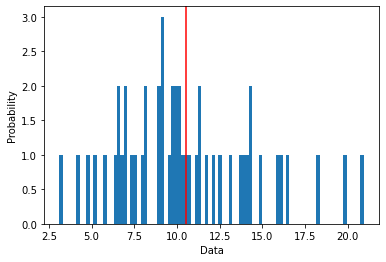

In [525]:
#plot the rmse graph
test_rmse_min = min(rmse_list)
test_rmse_max = max(rmse_list)

num_bins = (math.ceil(test_rmse_max) - math.floor(test_rmse_min)) * 5
plt.hist(rmse_list, bins=num_bins, range=[test_rmse_min, test_rmse_max])
plt.axvline(x = average_rmse, c="r")


plt.ylabel('Probability')
plt.xlabel('Data')


- the varaince is big, probably from 3 to 22; several range of most possible RMSE are around 8, 9 ish, the average RMSE acorss 50 folds is around 10.51. 
- there's a general trend of distribution acound probability at 0.01.

### 2.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Use 10-fold cross validation and L2 normalization, and the same features as in 2.5. Report the RMSE for K=4 and the running time of the algorithm. What do you observe?

In [335]:
"""
Function
--------
K-Nearest Neighbors

Implementation of nearest neighbors algorithm.

Parameters
----------
x_train: array
    Array of numerical feature values for training the model.
y_train: array
    Array of numerical output values for training the model.
x_test: array
    Array of numerical feature values for testing the model.
y_test: array
    Array of numerical output values for testing the model.
L: int
    Order of L-norm function used for calculating distance.
K: int
    Neighbors to include in algorithm
    
Returns
-------
rmse : int
    Value of the RMSE from data.
"""

def knn(x_train, y_train, x_test, y_test, L, K):
    start_time = time.time()
    #initiate the output list
    output = []
    
    #loop the test/validation set value (this case k/length is 4)
    for test in range(len(x_test)):
        #initiate the distance list
        d = []
        
        #get the individual test/validation row values
        test_row = x_test.iloc[test].values
        
        #loop the train value for comparison
        for train in range(len(x_train)):
            #get the individual train set row value
            train_row = x_train.iloc[train].values
            #append the distance between each validation row value and the test train set row value
            d.append(distance(train_row, test_row, 2))
            
        #convert distance list to dataframe    
        df_dists = pd.DataFrame(data= d, index= y_train.index, columns= ['dist'])
        
        #sort the distance ascending and get the first k values
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:K]
        #get the index of theses k value
        df_idx = df_nn.index    
        #calculate the mean y value based on the k y predict value
        mean_k = y_train.loc[df_idx].mean()
        
        #append the row mean to the output list
        output.append(mean_k)
    
    #calculate the rmse 
    rmse = compute_rmse(output, y_test)
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    
    return rmse

In [365]:
# enter your additional code here
k_f = 10
folds = np.array_split(optNN_train_df, k_f)
total_rmse = 0
rmse_list = []

for i in range(k_f):
    #split into test and validation set
    train_df = folds.copy()
    validation_df = folds[i]
    
    del train_df[i]
    train_df = pd.concat(train_df, sort= False)
    
    #set the value
    train_x_df = train_df[['CRIM_opt', 'RM_opt', 'ZN_opt']]
    train_y_df = train_df['MEDV']

    validation_x_df = validation_df[['CRIM_opt', 'RM_opt', 'ZN_opt']]
    validation_y_df = validation_df['MEDV']
    
    #calculate rmse for the knn while K neighbors is 4
    rmse = knn(train_x_df,train_y_df, validation_x_df,validation_y_df, 2,4)
    
    #calculate rmse and average
    rmse_list.append(rmse)
    total_rmse += rmse
    
    average_rmse = total_rmse / k_f

print(rmse_list)    
print(average_rmse)

Time taken: 1.24 seconds
Time taken: 1.14 seconds
Time taken: 1.12 seconds
Time taken: 1.16 seconds
Time taken: 1.19 seconds
Time taken: 1.18 seconds
Time taken: 1.12 seconds
Time taken: 1.16 seconds
Time taken: 1.12 seconds
Time taken: 1.11 seconds
[8.523781553611299, 9.321621724729415, 8.542366359874517, 8.209563982908817, 7.1239322838029935, 8.149595364511246, 7.784647720454596, 10.756812406930537, 10.497523204120705, 10.291639220155254]
8.920148382109938


- The rmse for 10-fold cross validation, k=4 is 8.92. 
- For calculating each fold, it takes around 1 sec. The overall calculation time takes around 10 seconds

### 2.7 Using cross validation to find K

Compute the cross-validated RMSE for values of K between 1 and 25 using 10-fold cross-validation and L2 normalization.  Use the following features in your model: `CRIM, ZN, RM, AGE, DIS, TAX`.  Create a graph that shows how cross-validated RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

Finally, report the test RMSE using the value of K that minimized the cross-validated RMSE. (Continue to use L2 normalization and the same set of features). How does the test RMSE compare to the cross-validated RMSE, and is this what you expected? How does the test RMSE compare to the test RMSE from 2.4, and is this what you expected?

In [355]:
#Create needed df with the updated standardized value
cv_train_df_b = bdata_train[['AGE', 'DIS', 'TAX']]

raw_AGE = normalize(cv_train_df_b['AGE'])
optNN_train_df['AGE_opt'] = raw_AGE[0] 
print('AGE SD: ' + str(raw_AGE[1]) + ' AGE mean: ' + str(raw_AGE[2]))

raw_DIS = normalize(cv_train_df_b['DIS'])
optNN_train_df['DIS_opt'] = raw_DIS[0]
print('DIS SD: ' + str(raw_DIS[1]) + ' DIS mean: ' + str(raw_DIS[2]))

raw_TAX = normalize(cv_train_df_b['TAX'])
optNN_train_df['TAX_opt'] = raw_TAX[0]
print('TAX SD: ' + str(raw_TAX[1]) + ' TAX mean: '+ str(raw_TAX[2]))

cv_train_df = optNN_train_df[['CRIM_opt', 'ZN_opt', 'RM_opt','AGE_opt', 'DIS_opt', 'TAX_opt','MEDV']]
cv_train_df

AGE SD: 28.75817952331717 AGE mean: 66.95250659630607
DIS SD: 2.165302666121738 DIS mean: 4.1200410108596275
TAX SD: 165.96237928305402 TAX mean: 409.6253298153034


,CRIM_opt,ZN_opt,RM_opt,AGE_opt,DIS_opt,TAX_opt,MEDV
440,2.464445,-0.494409,-0.381070,0.884878,-0.875253,1.623107,10.5
215,-0.405731,-0.494409,-0.369005,-0.853757,-0.040599,-0.781052,25.0
212,-0.398334,-0.494409,-0.570027,-0.457348,-0.035179,-0.726823,22.4
197,-0.443454,2.899021,1.420486,-1.055439,1.594584,-0.455678,30.3
161,-0.240184,-0.494409,1.579553,0.829242,-0.925604,0.038410,50.0
...,...,...,...,...,...,...,...
250,-0.423911,0.438784,0.453204,-1.876075,1.516293,-0.449652,24.4
234,-0.400970,-0.494409,0.684348,-0.015735,-0.110274,-0.540034,29.0
321,-0.392161,-0.494409,0.062537,-0.439962,0.206550,-0.672594,23.1
425,1.630790,-0.494409,-0.441491,0.989197,-0.979058,1.629132,8.3


In [420]:
#initialize value 
K = list(range(1, 26))
k_f = 10
folds = np.array_split(cv_train_df, k_f)
K_rmse = []

#loop through the K neighbors from 1-25
for j in K:
    #create list for the total rmse for each K neighbors iteration
    total_rmse = 0
    
    #loop through each 10 folds
    for i in range(k_f):
        
        #split into test and validation set
        train_df = folds.copy()
        validation_df = folds[i]

        del train_df[i]
        train_df = pd.concat(train_df, sort= False)

        #set the value
        train_x_df = train_df[['CRIM_opt', 'ZN_opt', 'RM_opt','AGE_opt', 'DIS_opt', 'TAX_opt']]
        train_y_df = train_df['MEDV']

        validation_x_df = validation_df[['CRIM_opt', 'ZN_opt', 'RM_opt','AGE_opt', 'DIS_opt', 'TAX_opt']]
        validation_y_df = validation_df['MEDV']
        
        #calculate rmse for each iteration
        rmse = knn(train_x_df,train_y_df, validation_x_df,validation_y_df, 2, j)
    
        #calculate rmse and average
        total_rmse += rmse
        
    #calculate the average rmse for the iteration
    average_rmse = total_rmse / k_f
    
    #append the average rmse for each K neighbor 
    K_rmse.append(average_rmse)

print(K_rmse)   

Time taken: 1.19 seconds
Time taken: 1.16 seconds
Time taken: 1.38 seconds
Time taken: 1.29 seconds
Time taken: 1.29 seconds
Time taken: 1.17 seconds
Time taken: 1.32 seconds
Time taken: 1.18 seconds
Time taken: 1.10 seconds
Time taken: 1.08 seconds
Time taken: 1.11 seconds
Time taken: 1.15 seconds
Time taken: 1.14 seconds
Time taken: 1.12 seconds
Time taken: 1.10 seconds
Time taken: 1.08 seconds
Time taken: 1.08 seconds
Time taken: 1.21 seconds
Time taken: 1.12 seconds
Time taken: 1.10 seconds
Time taken: 1.14 seconds
Time taken: 1.20 seconds
Time taken: 1.36 seconds
Time taken: 1.27 seconds
Time taken: 1.17 seconds
Time taken: 1.19 seconds
Time taken: 1.13 seconds
Time taken: 1.17 seconds
Time taken: 1.10 seconds
Time taken: 1.10 seconds
Time taken: 1.13 seconds
Time taken: 1.09 seconds
Time taken: 1.23 seconds
Time taken: 1.21 seconds
Time taken: 1.14 seconds
Time taken: 1.12 seconds
Time taken: 1.09 seconds
Time taken: 1.10 seconds
Time taken: 1.19 seconds
Time taken: 1.10 seconds


In [450]:
#create dataframe based on the rmse list 
k_df = pd.DataFrame(K_rmse, columns = ['RMSE'])
k_df['K'] = K
k_df

,RMSE,K
0,12.264420,1
1,10.741622,2
2,9.868499,3
3,9.705533,4
4,9.435587,5
5,9.231930,6
6,9.199573,7
7,9.358264,8
8,9.261909,9
9,9.192242,10


Text(0.42499999999999716, 0.5, 'RMSE Value')

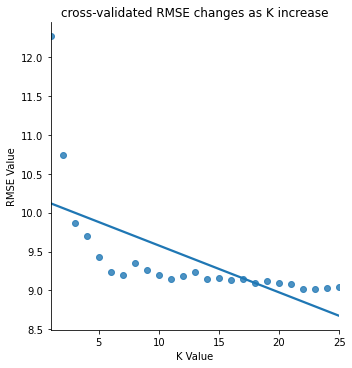

In [458]:
#Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in red. Make sure to label your axes appropriately, and add a legend to your figure to make clear which dots are which.
#plt.scatter(k_df['K'], k_df['RMSE'], c='b')
import seaborn as sns


sns.lmplot(x='K',y='RMSE',data=k_df, fit_reg=True, ci = False)
plt.title('cross-validated RMSE changes as K increase')
plt.xlabel('K Value')
plt.ylabel('RMSE Value')

In [451]:
#get the minimum RMSE and it's K value
min_value = k_df['RMSE'].min() 
min_k = k_df.loc[k_df.RMSE == min_value]
min_k

,RMSE,K
21,9.014481,22


In [533]:
cv_test = bdata_test[['CRIM', 'ZN', 'RM','AGE', 'DIS', 'TAX']]
cv_train = bdata_train[['CRIM', 'ZN', 'RM','AGE', 'DIS', 'TAX']]
train_cv, test_cv = normalize_df(cv_train, cv_test)
test_cv

curr_y_train = optNN_train_df['MEDV']
curr_y_test = optNN_test_df['MEDV']

print('the test rmse for k take the value of 22 is: ')
knn(train_cv, curr_y_train, test_cv, curr_y_test, 2, 22)

the test rmse for k take the value of 22 is: 
Time taken: 4.26 seconds


9.630490902025244

How does the test RMSE compare to the cross-validated RMSE, and is this what you expected? How does the test RMSE compare to the test RMSE from 2.4, and is this what you expected?
- The best cross RMSE is 9.01, the test RMSE is 9.63. Which is what I expected, the RMSE for test set is similar to the RMSE for the cross validate set. 
- The best RMSE from any 2 feature is 7.746; in this case the 6 features might be overfitting. 

### Extra-Credit: Forward selection

Thus far the choice of predictor variables has been rather arbitrary. For extra credit, implement a basic [forward selection](https://see.stanford.edu/materials/aimlcs229/cs229-notes5.pdf) algorithm to progressively include features that decrease the cross-validated RMSE of the model. Note that the optimal value of K may be different for each model, so you may want to use cross-validation to choose K each time (but it is also fine if you fix K at the optimal value from 2.7).  Create a graph that shows RMSE as a function of the number of features in the model. Label each point on the x-axis with the name of the feature that is added at that step in the forward selection algorithm. *(For instance, if the optimal single-feature model has CRIM with RMSE = 10, and the optimal two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will say CRIM and the second x-axis lable with say ZN)*

In [ ]:
# enter your code here